## Insurance Claims- Fraud Detection<br>
**Problem Statement:**<br>
Business case:<br>
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.<br>

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. <br>

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. <br>



In [235]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('max_columns', None)
warnings.filterwarnings('ignore')
from termcolor import colored

In [236]:
## Reading the dataset
data=pd.read_csv('Automobile_insurance_fraud.csv')
## Saving a copy of the original dataset
data_copy=data

data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [237]:
data.shape

(1000, 40)

- dataset has 39 features and 1000 observations.

**Data Cleaning**

In [238]:
data['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [239]:
data['insured_zip'].value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

In [240]:
data['incident_location'].value_counts()

4545 4th Ridge         1
6731 Andromedia Hwy    1
7316 Texas Ave         1
3590 Best Hwy          1
4055 2nd Drive         1
                      ..
6608 Apache Lane       1
1707 Sky Ave           1
7504 Flute Drive       1
5904 1st Drive         1
5061 Francis Ave       1
Name: incident_location, Length: 1000, dtype: int64

**We will drop:**
- **'_c39'** because it does not store any values
- **'insured_zip', 'incident_location', 'policy_bind_date'** because they store unique values for each observations and hence will not add any value to our analysis
- **'policy_number'** because it just stores unique id for each observation

In [241]:
## Dropping the above mentioned features
data.drop(['_c39','insured_zip', 'incident_location', 'policy_bind_date','policy_number'],axis=1,inplace=True)

- Converting 'incident_date' in 'datetime' format and extracting only 'Day' and 'Month'
- Will drop 'incident_date' after this

In [242]:
data['incident_date'] = pd.to_datetime(data.incident_date)
data['incident_date'].head(2)

0   2015-01-25
1   2015-01-21
Name: incident_date, dtype: datetime64[ns]

In [243]:
data['Day'] = data.incident_date.apply(lambda x: x.day)
data['Month'] = data.incident_date.apply(lambda x: x.month)

In [244]:
data.drop('incident_date',axis=1,inplace=True)

In [245]:
data.shape

(1000, 36)

- Now, we have 35 features left.
- 'fraud_reported' is our target and stores object data

In [246]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

- We have 3 datatypes in our data: 'int64', 'float64', 'object'

In [247]:
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
data.select_dtypes(include='object').columns

columns with object data: 


Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [248]:
print(colored('columns with numeric data: ',attrs=['bold','underline'],color='blue'))

data.select_dtypes(include=['int64','float64']).columns

columns with numeric data: 


Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'Day', 'Month'],
      dtype='object')

In [16]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

- No features has missing values
- However, features, 'collision_type', 'property_damage', 'police_report_available' missing values labeled as '?'. Need to inspect this during further analysis.

In [17]:
## Checking the unique classes and their frequencies in target variable
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

- target has two classes, 'Y'(yes) and 'N'(no)
- 'Y' forms about 33% and 'N' forms about 67% of the data
- will not treat this as an imbalanced data

In [18]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,10
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,2


Catagorical Features:
- policy_state	
- policy_csl	
- policy_deductable
- 'umbrella_limit'
- insured_sex	
- insured_education_level	
- insured_occupation	
- insured_hobbies
- insured_relationship
- incident_type	
- collision_type	
- incident_severity	
- authorities_contacted	
- incident_state	
- incident_city
- property_damage
- police_report_available
- auto_make	
- auto_model	

Continuous Features:
- months_as_customer	
- age
- policy_annual_premium
- capital-gains	
- capital-loss
- incident_hour_of_the_day	
- number_of_vehicles_involved
- bodily_injuries	
- witnesses
- total_claim_amount	
- injury_claim	
- property_claim	
- vehicle_claim
- auto_year
- Day
- Month

In [66]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [67]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [68]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

- In all of the above three features, the '?' class, where the values are not known, forms substancial portion of each of them. 
- Hence we will treat '?' as a seperate class in each of the three features.

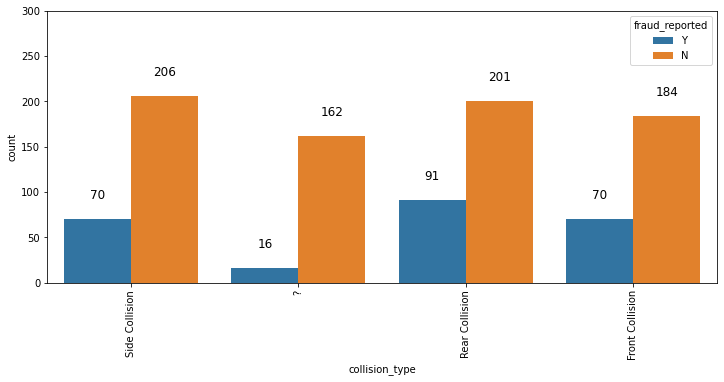

In [20]:
plt.figure(figsize=(12,5))
plt.ylim(0,300)
plt.xticks(rotation=90)
ax=sns.countplot(data['collision_type'],hue=data['fraud_reported'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+50), ha='center', va='top', color='black', size=12)
plt.show()

- Chances of insurance claim to be fraudulent are very less in cases where the 'collision_type' is not known.

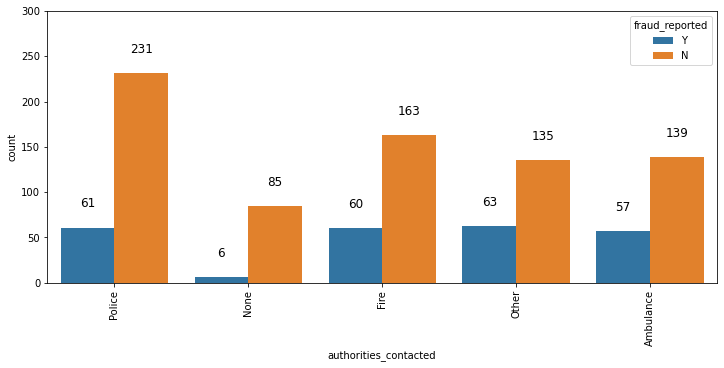

In [23]:
plt.figure(figsize=(12,5))
plt.ylim(0,300)
plt.xticks(rotation=90)
ax=sns.countplot(data['authorities_contacted'],hue=data['fraud_reported'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+50), ha='center', va='top', color='black', size=12)
plt.show()

- Cases where the authorities are not contacted after the incident are more likely to be non fraudulent.

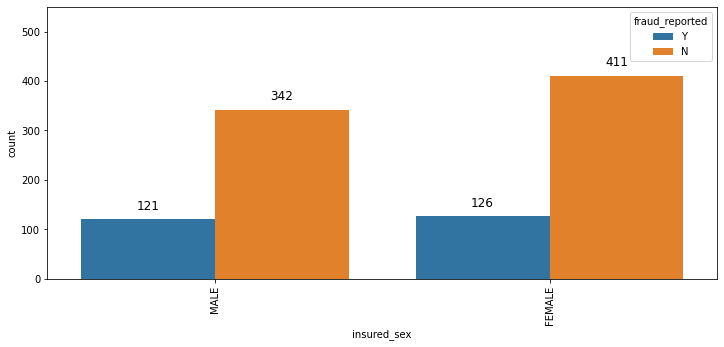

In [22]:
plt.figure(figsize=(12,5))
plt.ylim(0,550)
plt.xticks(rotation=90)
ax=sns.countplot(data['insured_sex'],hue=data['fraud_reported'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+70), ha='center', va='top', color='black', size=12)
plt.show()

- Males tend to file fraudulent claims more than the females

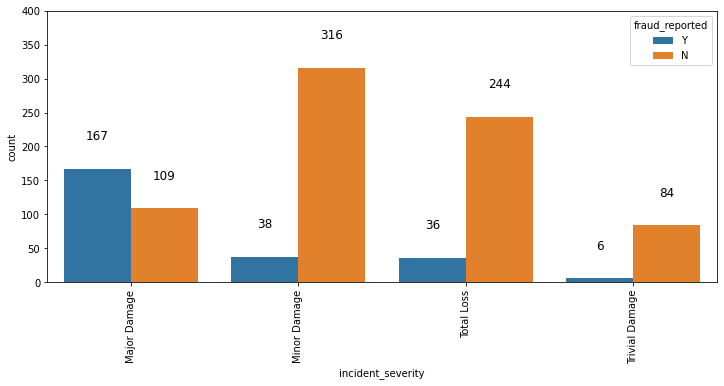

In [25]:
plt.figure(figsize=(12,5))
plt.ylim(0,400)
plt.xticks(rotation=90)
ax=sns.countplot(data['incident_severity'],hue=data['fraud_reported'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+80), ha='center', va='top', color='black', size=12)
plt.show()

- Insurance claims for the incidents resulting in major damage are more likely to be fraudulent 

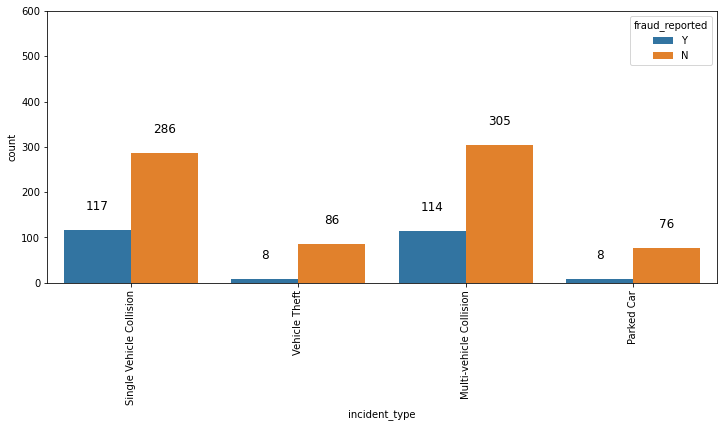

In [26]:
plt.figure(figsize=(12,5))
plt.ylim(0,600)
plt.xticks(rotation=90)
ax=sns.countplot(data['incident_type'],hue=data['fraud_reported'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=12)
plt.show()

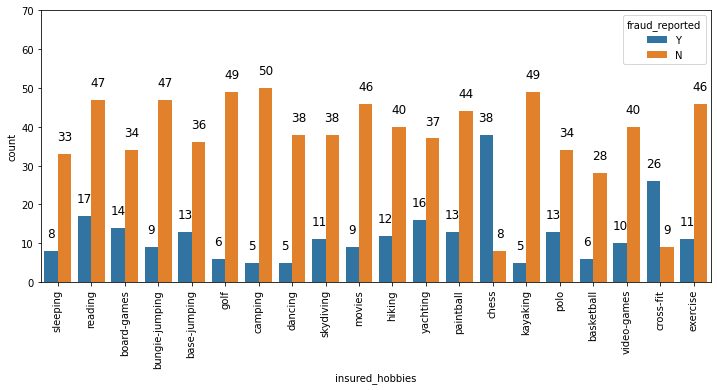

In [111]:
plt.figure(figsize=(12,5))
plt.ylim(0,70)
plt.xticks(rotation=90)
ax=sns.countplot(data['insured_hobbies'],hue=data['fraud_reported'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+10), ha='center', va='top', color='black', size=12)
plt.show()

- Insurance claims by persons with hobbies 'cross_fit' and 'chess' are most likely to be fraudulent.

In [34]:
cont_feat=data[['months_as_customer','age','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved',
                   'bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year','Day','Month']]

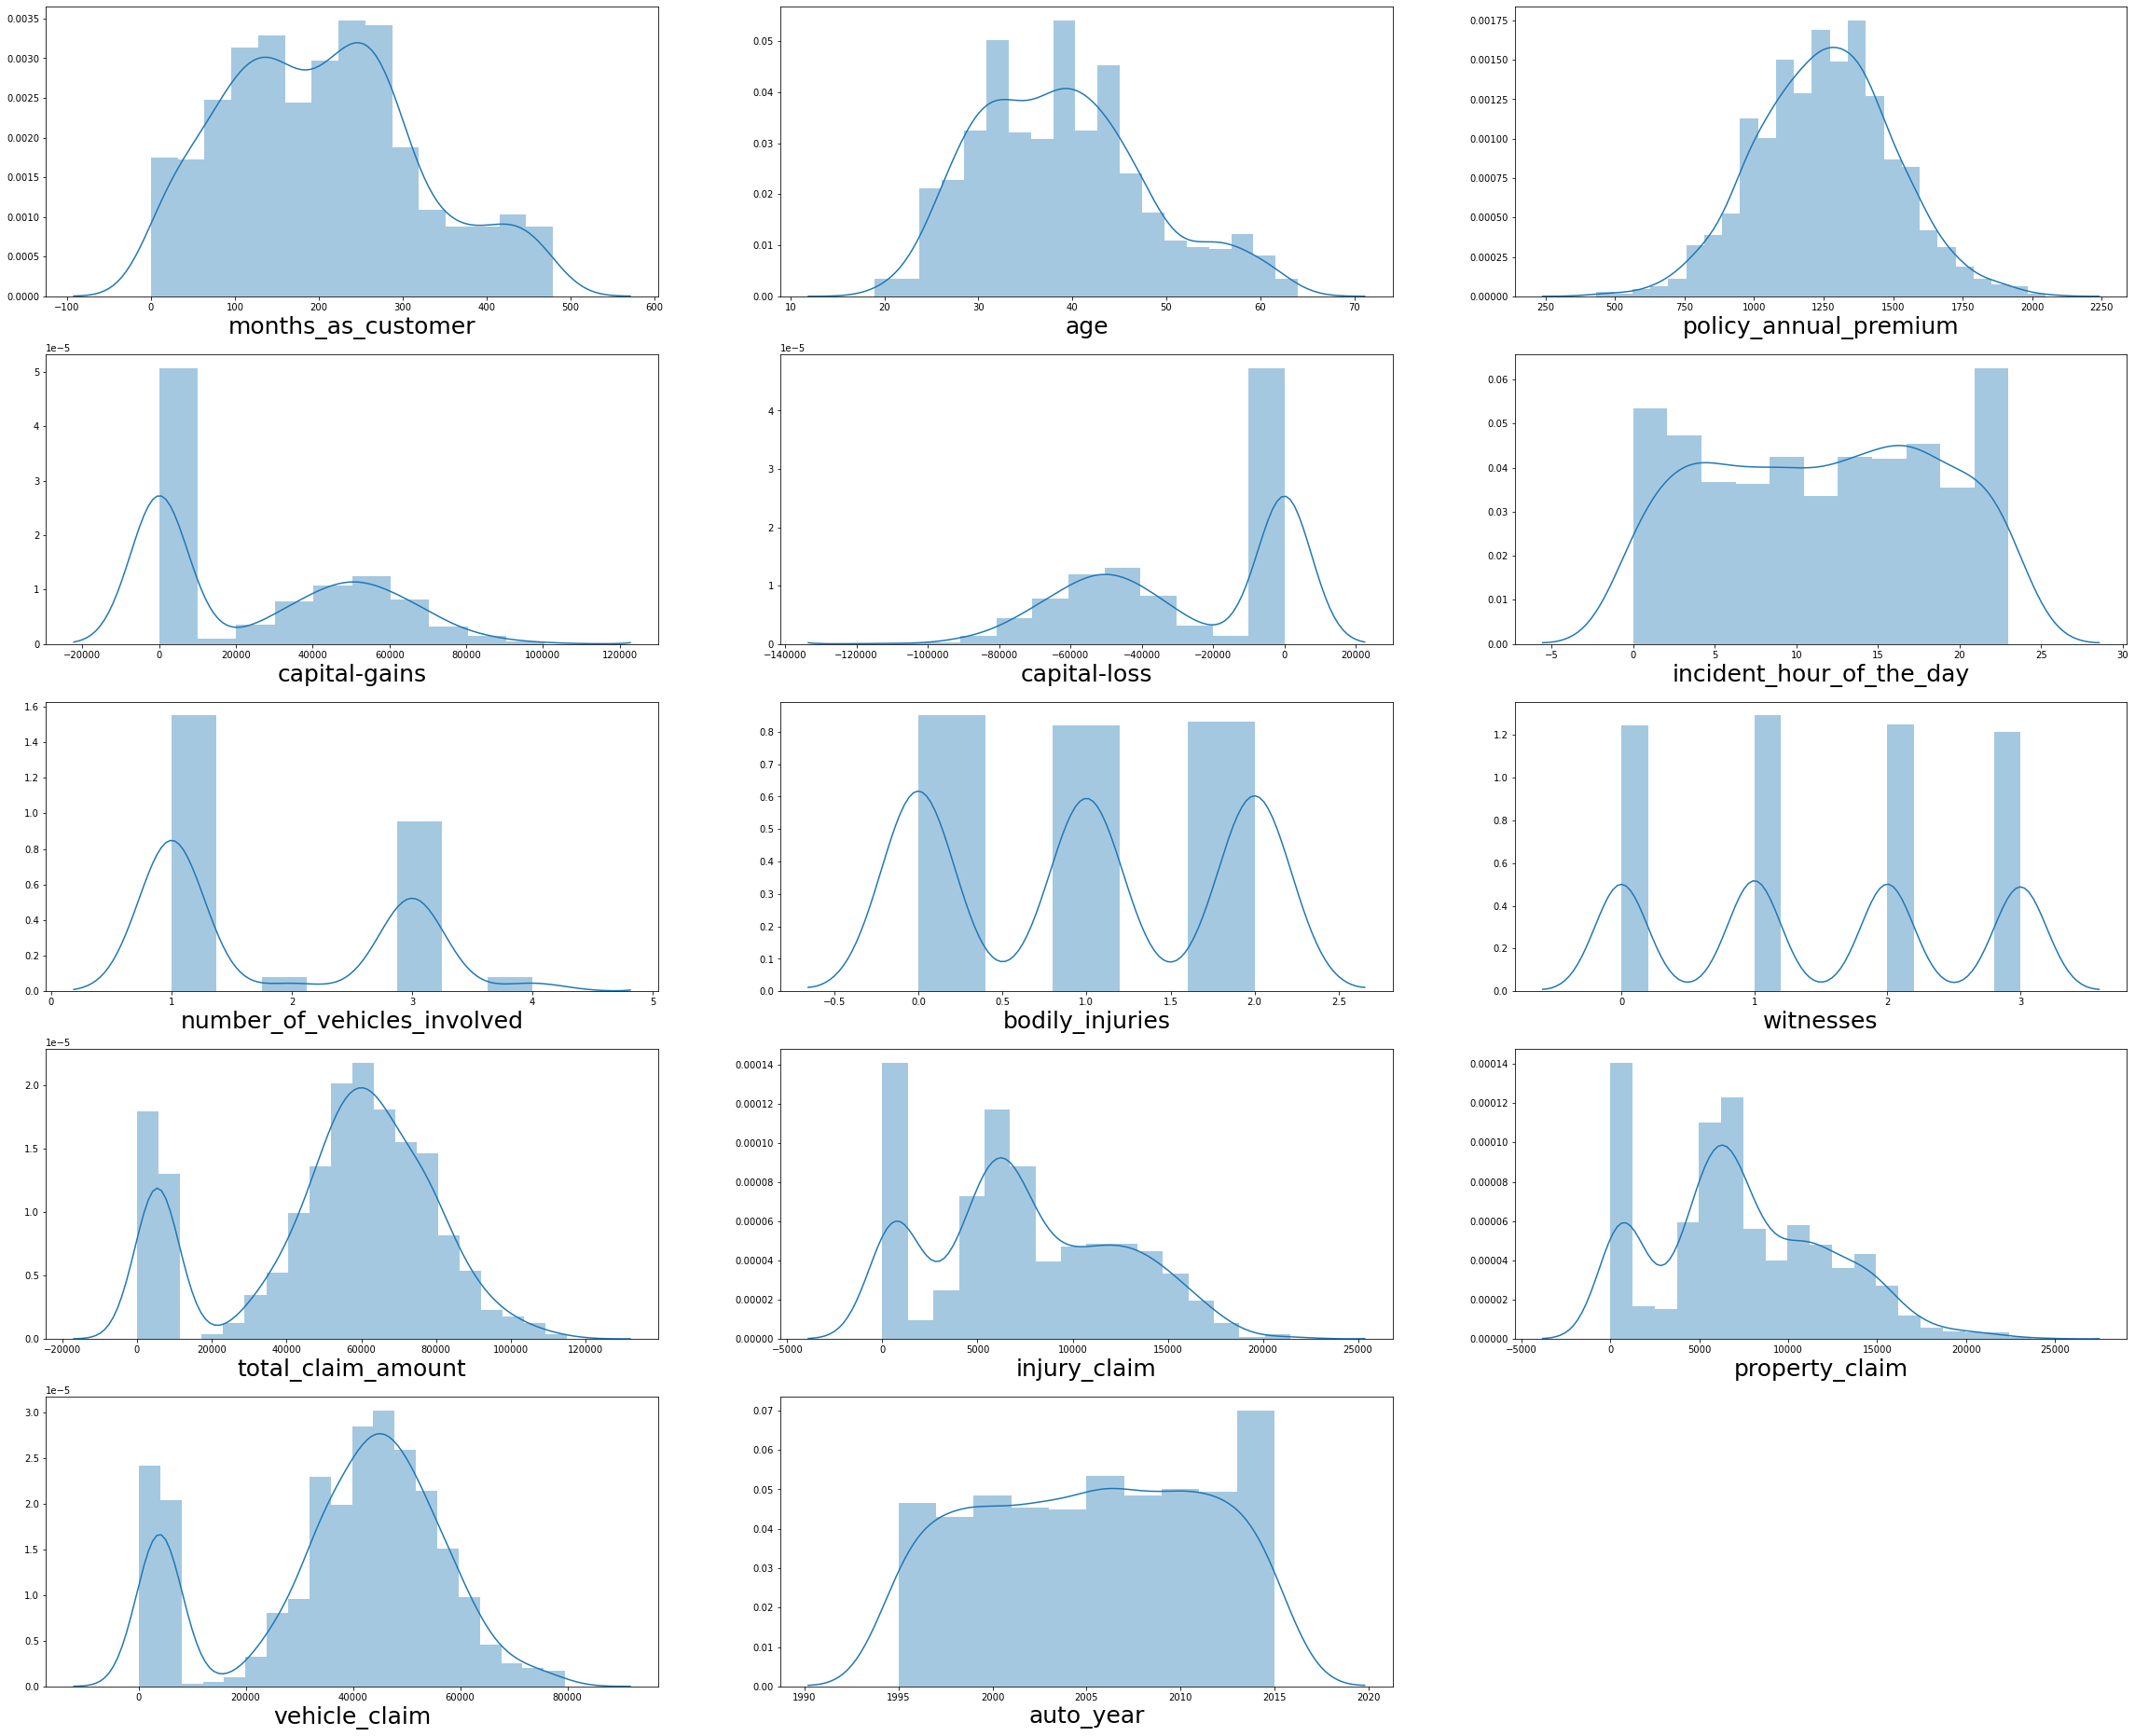

In [42]:
## Checking the distribution of the continuous features

plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<15:
        ax=plt.subplot(6,3,plot_number)
        sns.distplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

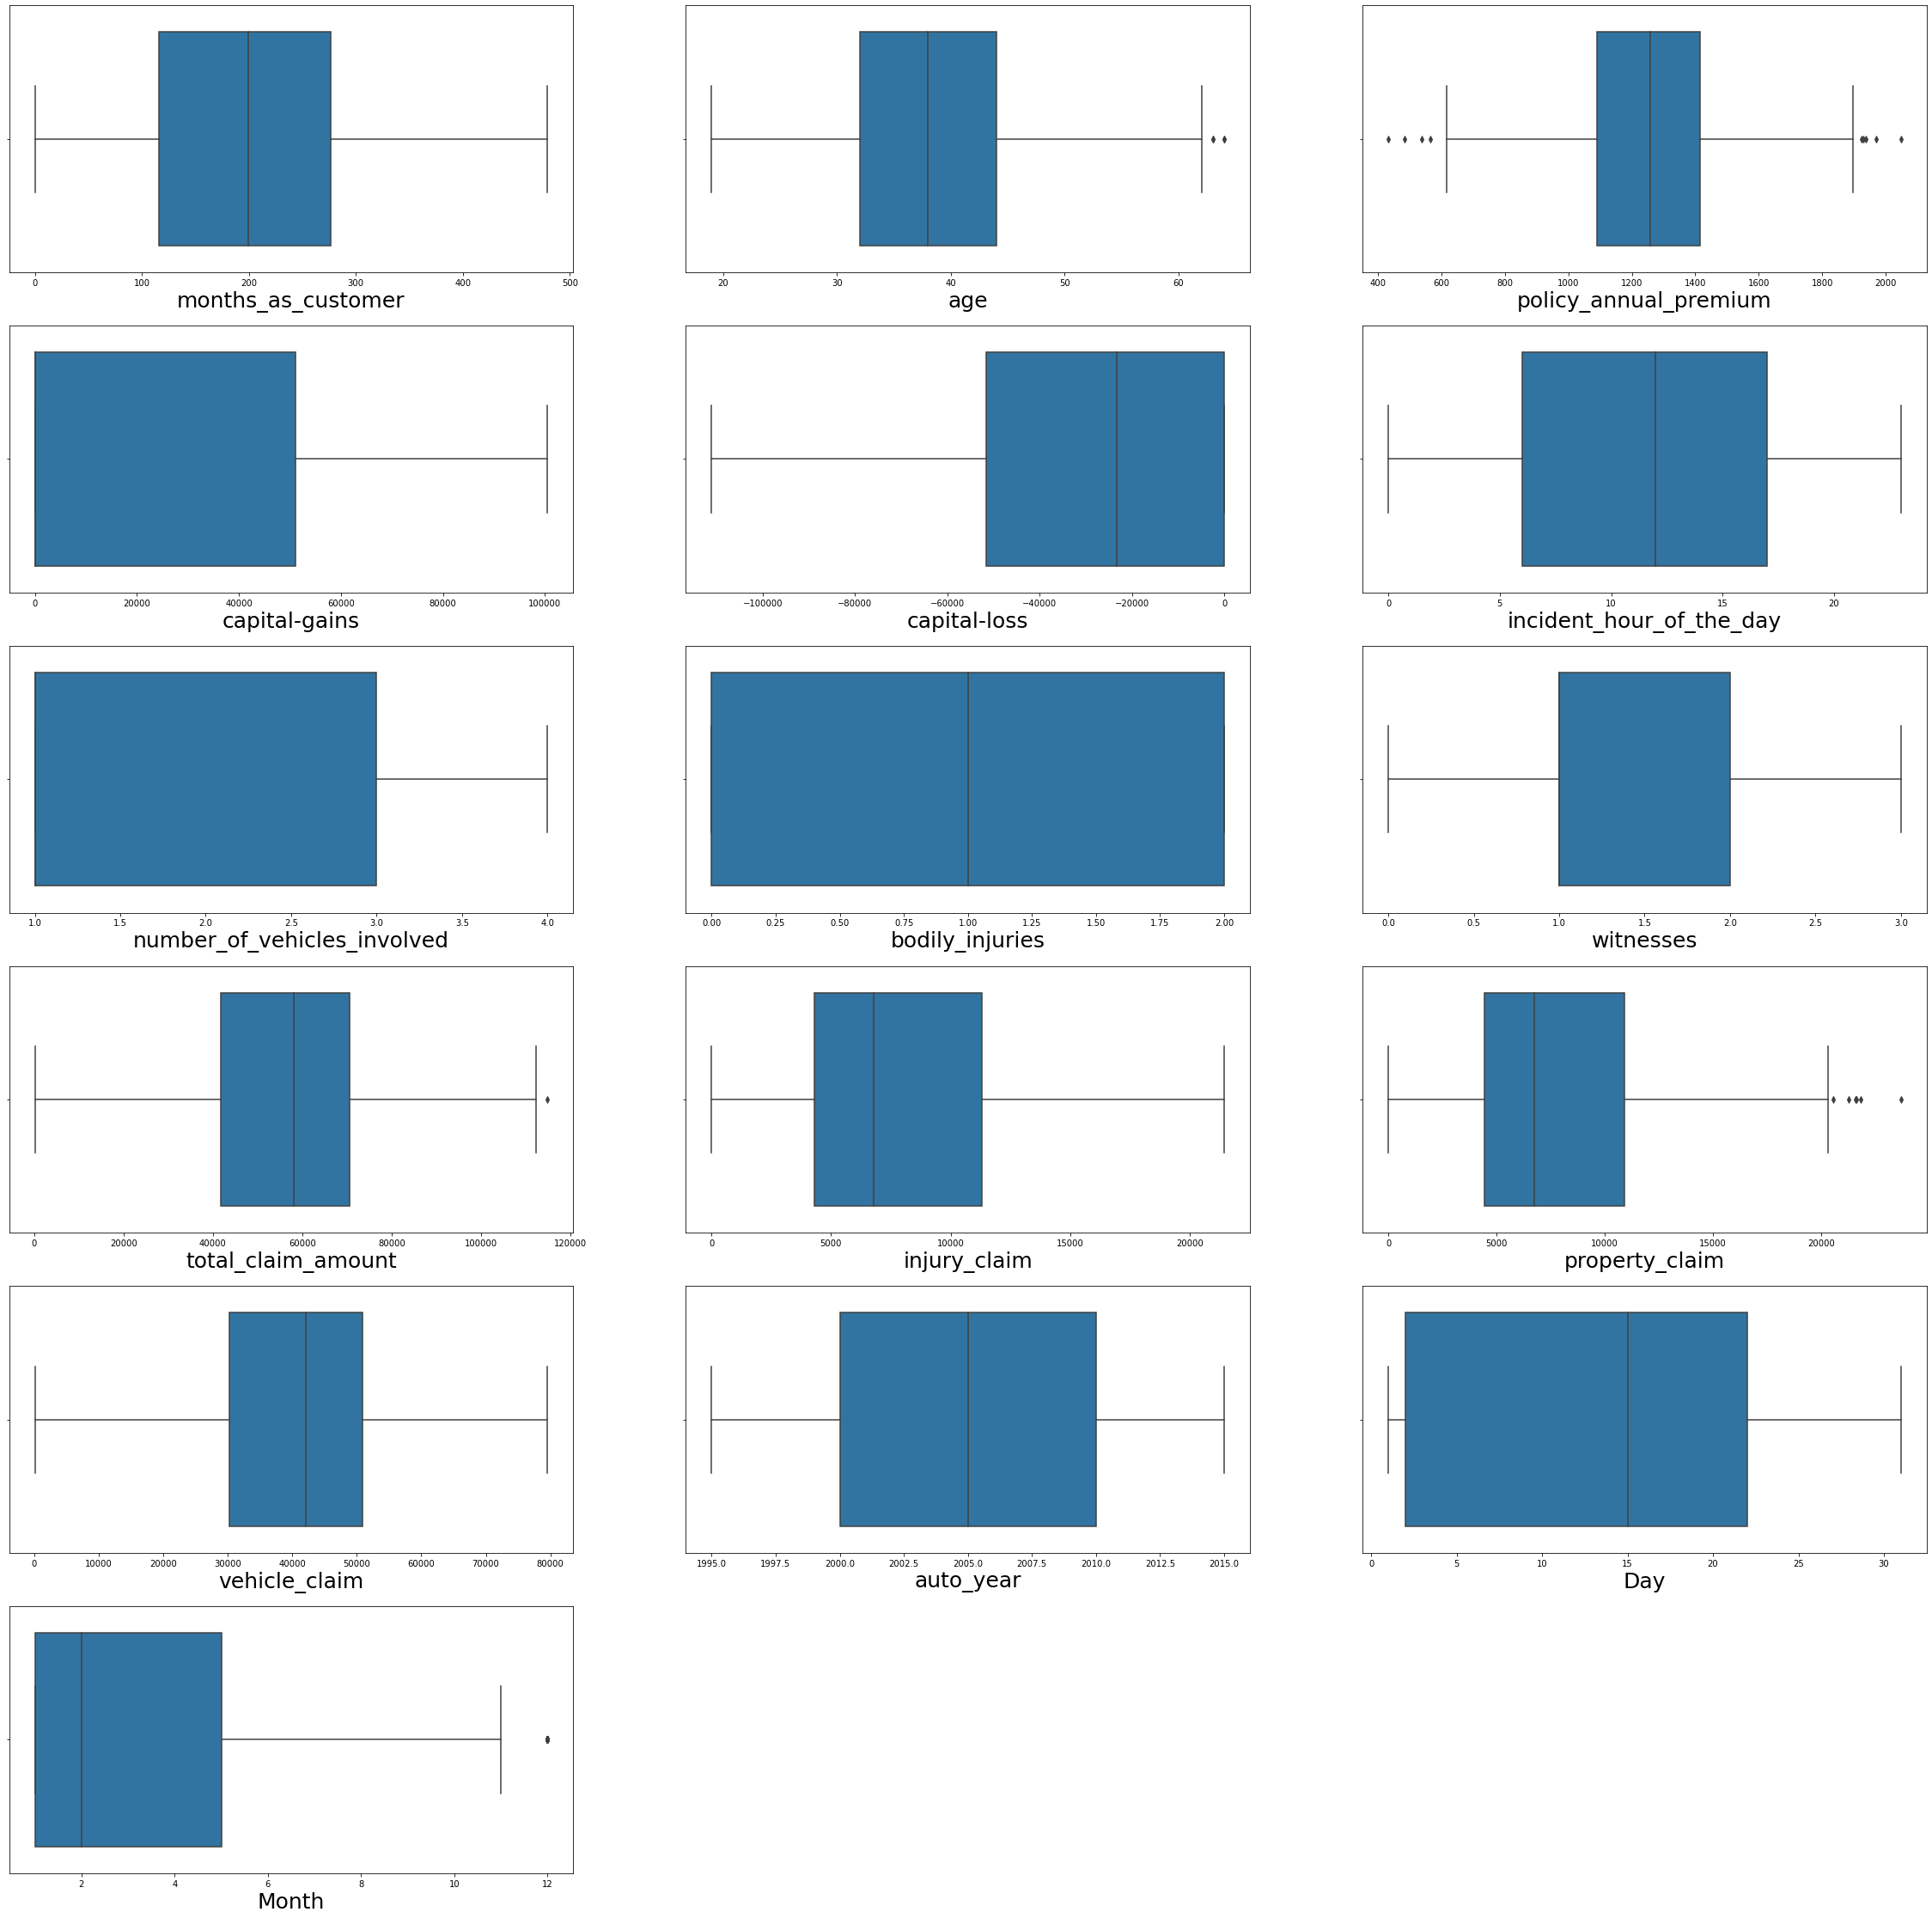

In [40]:

plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        sns.boxplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

 **'age', 'policy_annual_premium', 'total_claim_amount', 'property_claim', 'Month' shows outliers but all these outliers have values which are possible in real world. <br>
Hence we will mot remove any outliers from this data.**

### Encoding the object type data

In [43]:
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
data.select_dtypes(include='object').columns

columns with object data: 


Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

a=['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported']

for i in a:
    data[i]=le.fit_transform(data[i])

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   int32  
 8   insured_education_level      1000 non-null   int32  
 9   insured_occupation           1000 non-null   int32  
 10  insured_hobbies              1000 non-null   int32  
 11  insured_relationship         1000 non-null   int32  
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

- Successfully encoded all the object data

**Checking the relationship between features and label using ANOVA F-values**

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [84]:
selectbest=SelectKBest(score_func=f_classif,k=36)
selectbest.fit(data,data['fraud_reported'])

SelectKBest(k=36)

In [85]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(data.columns)

In [86]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(36,'Scores')

,Features,Scores
33,fraud_reported,inf
16,incident_severity,196.960603
29,vehicle_claim,29.718214
26,total_claim_amount,27.463776
28,property_claim,19.327729
15,collision_type,12.252860
27,injury_claim,8.328776
6,umbrella_limit,3.441452
21,number_of_vehicles_involved,2.689100
18,incident_state,2.644427


- Will dropp bottom 10 features which have very low scores

In [87]:
data.drop(['auto_model','insured_occupation','incident_hour_of_the_day','auto_year','insured_education_level','age',
          'policy_annual_premium','Month','policy_deductable','capital-loss'],axis=1,inplace=True)

In [89]:
data.shape

(1000, 26)

Seperating the features and the label

In [90]:
X=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

**Scaling the features**

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [92]:
X_scaled=scaler.fit_transform(X)

**Splitting the data into training and testing sets**

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

**Importing the classification performance metrics**

In [106]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_roc_curve,roc_curve
from sklearn.model_selection import cross_val_score

## Model 1: Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()

In [154]:
lrc.fit(X_train,y_train)

LogisticRegression()

In [155]:
y_lrc=lr.predict(X_test)

In [156]:
lrc_score=accuracy_score(y_test,y_lrc)
lrc_score

0.732

In [157]:
lrc_cvs=cross_val_score(lrc,X_scaled,y,cv=5).mean()
lrc_cvs

0.7849999999999999

In [158]:
print(confusion_matrix(y_test,y_lrc))

[[162  21]
 [ 46  21]]


In [159]:
print(classification_report(y_test,y_lrc))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       183
           1       0.50      0.31      0.39        67

    accuracy                           0.73       250
   macro avg       0.64      0.60      0.61       250
weighted avg       0.70      0.73      0.71       250



In [160]:
lrc_f1=f1_score(y_test,y_lrc)

lrc_f1

0.3853211009174312

## Model 2: SVC

In [108]:
from sklearn.svm import SVC
svc=SVC()

In [110]:
svc.fit(X_train,y_train)

SVC()

In [111]:
y_svc=svc.predict(X_test)

In [112]:
svc_score=accuracy_score(y_test,y_svc)
svc_score

0.748

In [113]:
svc_cvs=cross_val_score(svc,X_scaled,y,cv=5).mean()
svc_cvs

0.756

In [115]:
svc_f1=f1_score(y_test,y_svc)
svc_f1

0.3225806451612903

In [116]:
print(confusion_matrix(y_test,y_svc))

[[172  11]
 [ 52  15]]


In [117]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       183
           1       0.58      0.22      0.32        67

    accuracy                           0.75       250
   macro avg       0.67      0.58      0.58       250
weighted avg       0.72      0.75      0.71       250



## Model 3: KNeighborsClassifier

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

In [176]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [177]:
y_knc=knc.predict(X_test)

In [178]:
knc_score=accuracy_score(y_test,y_knc)
knc_score

0.712

In [179]:
knc_cvs=cross_val_score(knc,X_scaled,y,cv=5).mean()
knc_cvs

0.7209999999999999

In [180]:
knc_f1=f1_score(y_test,y_knc)
knc_f1

0.2

In [181]:
print(confusion_matrix(y_test,y_knc))

[[169  14]
 [ 58   9]]


In [182]:
print(classification_report(y_test,y_knc))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       183
           1       0.39      0.13      0.20        67

    accuracy                           0.71       250
   macro avg       0.57      0.53      0.51       250
weighted avg       0.65      0.71      0.66       250



## Model 4: Random Forest Classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [130]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [131]:
y_rfc=rfc.predict(X_test)

In [132]:
rfc_score=accuracy_score(y_test,y_rfc)
rfc_score

0.78

In [133]:
rfc_cvs=cross_val_score(rfc,X_scaled,y,cv=5).mean()
rfc_cvs

0.7869999999999999

In [134]:
rfc_f1=f1_score(y_test,y_rfc)
rfc_f1

0.5454545454545455

In [135]:
print(confusion_matrix(y_test,y_rfc))

[[162  21]
 [ 34  33]]


In [136]:
print(classification_report(y_test,y_rfc))

              precision    recall  f1-score   support

           0       0.83      0.89      0.85       183
           1       0.61      0.49      0.55        67

    accuracy                           0.78       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.77      0.78      0.77       250



## Model 5: ADA Boost Classifier

In [137]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [138]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [139]:
y_abc=abc.predict(X_test)

In [140]:
abc_score=accuracy_score(y_test,y_abc)
abc_score

0.768

In [141]:
abc_cvs=cross_val_score(abc,X_scaled,y,cv=5).mean()
abc_cvs

0.795

In [142]:
abc_f1=f1_score(y_test,y_abc)
abc_f1

0.5166666666666667

In [143]:
print(confusion_matrix(y_test,y_abc))

[[161  22]
 [ 36  31]]


In [144]:
print(classification_report(y_test,y_abc))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       183
           1       0.58      0.46      0.52        67

    accuracy                           0.77       250
   macro avg       0.70      0.67      0.68       250
weighted avg       0.75      0.77      0.76       250



## Model 6: Gradient Boosting Classifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [146]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [147]:
y_gbc=gbc.predict(X_test)

In [148]:
gbc_score=accuracy_score(y_test,y_gbc)
gbc_score

0.796

In [149]:
gbc_cvs=cross_val_score(gbc, X_scaled,y,cv=5).mean()
gbc_cvs

0.8320000000000001

In [150]:
gbc_f1=f1_score(y_test,y_gbc)
gbc_f1

0.6330935251798562

In [151]:
print(confusion_matrix(y_test,y_gbc))

[[155  28]
 [ 23  44]]


In [152]:
print(classification_report(y_test,y_gbc))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       183
           1       0.61      0.66      0.63        67

    accuracy                           0.80       250
   macro avg       0.74      0.75      0.75       250
weighted avg       0.80      0.80      0.80       250



**Storing performance metrics for all the models in a single dataframe**

In [161]:
metrics=pd.DataFrame()
metrics['Model']=['Logistic Regression','ADAboost Classifier','KNN Classifier','SVC','RandomForest Classifier','GradientBoosting Classifier']
metrics['Accuracy Score']=[lrc_score,abc_score,knc_score,svc_score,rfc_score,gbc_score]
metrics['Cross Val Score']=[lrc_cvs,abc_cvs,knc_cvs,svc_cvs,rfc_cvs,gbc_cvs]
metrics['f1 Score']=[lrc_f1,abc_f1,knc_f1,svc_f1,rfc_f1,gbc_f1]

metrics

,Model,Accuracy Score,Cross Val Score,f1 Score
0,Logistic Regression,0.732,0.785,0.385321
1,ADAboost Classifier,0.768,0.795,0.516667
2,KNN Classifier,0.712,0.721,0.200000
3,SVC,0.748,0.756,0.322581
4,RandomForest Classifier,0.780,0.787,0.545455
5,GradientBoosting Classifier,0.796,0.832,0.633094


### Plotting the ROC_AUC curve

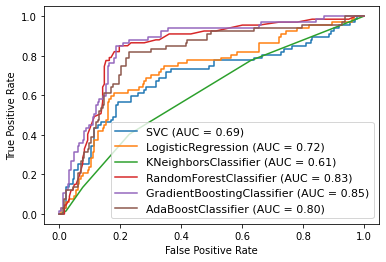

In [162]:
disp=plot_roc_curve(svc,X_test,y_test)

plot_roc_curve(lrc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

##### Based on Accuracy Score, Cross Val Score, f1 Score and AUC, Gradient Boosting Classifier is our best model

<font color='red'>
    
## Tuning the hyperparameters of the best model

In [183]:
from sklearn.model_selection import GridSearchCV

In [210]:
gbc_grid={'loss':['deviance','exponential'],'n_estimators':[80,100,120],
          'learning_rate':[0.01,0.05,0.1,0.3],'criterion':['friedman_mse','mse','mae']}

In [211]:
gridCV=GridSearchCV(gbc,param_grid=gbc_grid,n_jobs=-1)

In [212]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [80, 100, 120]})

In [213]:
gridCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'deviance',
 'n_estimators': 80}

In [214]:
gbc_best=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,loss='deviance',n_estimators=80)

In [215]:
gbc_best.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=80)

In [216]:
y_best=gbc_best.predict(X_test)

In [217]:
best_score=accuracy_score(y_test,y_best)
best_score

0.812

In [226]:
best_cvs=cross_val_score(gbc_best,X_scaled,y,cv=7).mean()
best_cvs

0.8370362032333863

In [219]:
best_f1=f1_score(y_test,y_best)
best_f1

0.6713286713286712

In [227]:
print(confusion_matrix(y_test,y_best))

[[155  28]
 [ 19  48]]


In [228]:
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       183
           1       0.63      0.72      0.67        67

    accuracy                           0.81       250
   macro avg       0.76      0.78      0.77       250
weighted avg       0.82      0.81      0.82       250



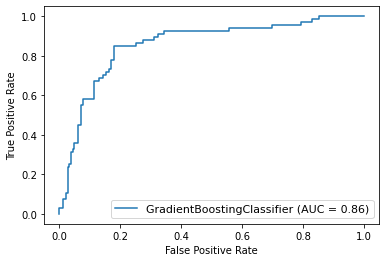

In [229]:
## Plotting the roc_auc curve for the best model
disp=plot_roc_curve(gbc_best,X_test,y_test)

plt.legend(prop={'size':11},loc='lower right')

**Saving the best model**

In [230]:
## Saving the best model
import pickle
filename='InsuranceFraud_gbc.pkl'
pickle.dump(gbc_best,open(filename,'wb'))